In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
%matplotlib inline

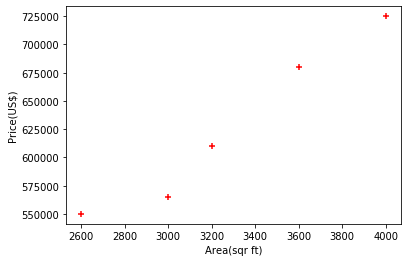

In [9]:
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
#scatter plot doesn't take 'r+'

In [10]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.predict([[3300]])

array([628715.75342466])

In [12]:
reg.coef_
#value of m

array([135.78767123])

In [13]:
reg.intercept_
#value for b

180616.43835616432

In [14]:
#y=mx+b
135.78767123*3300+180616.43835616432

628715.7534151643

In [15]:
d=pd.DataFrame({
    'area':[1000,1500,2300]
})

In [16]:
d

,area
0,1000
1,1500
2,2300


In [17]:
p=reg.predict(d)

In [18]:
d['prices']=p

In [19]:
d

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


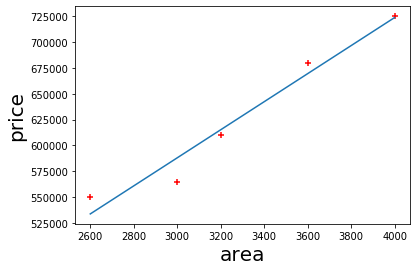

In [20]:
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]))

#array.reshape(-1,1) => row unknown ,column 1
#array.reshape(5,-1) => row 5 ,column unknown

In [21]:
import pickle
with open('model_pickle','wb')as f:
    pickle.dump(reg,f)

In [24]:
with open('model_pickle','rb')as f:
    mp=pickle.load(f)

In [25]:
mp.predict([[3300]])

array([628715.75342466])

In [26]:
#however its suggested to use sklearn's joblib in case your data contains large numpy arrays

In [27]:
from sklearn.externals import joblib

In [28]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [29]:
mj=joblib.load('model_joblib')

In [30]:
mj.predict([[3300]])

array([628715.75342466])

In [31]:
mj.coef_

array([135.78767123])

In [32]:
mj.intercept_

180616.43835616432